<a href="https://colab.research.google.com/github/patriciagvas/EDA/blob/main/EDA_Livros_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória sobre os livros lidos em 2024.**

Esta EDA tem como objetivo avaliar as minhas leituras de 2024 como, por exemplo, a quantidade de livros lidos por gênero, editora e país, média de páginas lidas por mês, entre outros.

O arquivo está dividido em colunas contendo o título, número de página, data de início e finalização, mês, dias de leitura, gênero, formato, editora, ano de lançamento, série ou único, autor, etnia, país e nota.

In [1]:
# Carregamento dos dados e bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


livros_2024 = pd.read_csv('/content/drive/MyDrive/Datasets - projetos/Livros-2024_1.csv')
livros_2024.head()

,Índice,Título,Páginas,Data Início,Data Fim,Mês,Dias de Leitura,Gênero,Formato,Editora,Ano de Lançamento,Série ou Único,Autor,Etnia,País,Nota
0,1,A História de Shuggie Bain,528,1/1/2024,1/4/2024,Janeiro,4,Contemporâneo,Físico,Intrínseca,2021,Livro único,Douglas Stuart,Branca,Irlanda,2.0
1,2,Pageboy,288,1/5/2024,1/7/2021,Janeiro,3,Memórias,Ebook,Intrínseca,2023,Livro único,Elliot Page,Branca,Canadá,5.0
2,3,Cultos,288,1/8/2024,1/10/2021,Janeiro,3,Não ficção,Físico,Darkside,2023,Livro único,Amanda Montell,Branca,EUA,3.5
3,4,A Caçadora,588,1/9/2024,1/15/2024,Janeiro,7,Ficção Histórica,Ebook,Verus,2021,Livro único,Kate Quinn,Branca,EUA,3.5
4,5,A metade perdida,336,1/17/2024,1/21/2024,Janeiro,5,Contemporâneo,Ebook,Intrínseca,2021,Livro único,Brit Bennett,Afro-americana,EUA,4.0


In [2]:
livros_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Índice             80 non-null     int64  
 1   Título             80 non-null     object 
 2   Páginas            80 non-null     int64  
 3   Data Início        80 non-null     object 
 4   Data Fim           80 non-null     object 
 5   Mês                80 non-null     object 
 6   Dias de Leitura    80 non-null     int64  
 7   Gênero             80 non-null     object 
 8   Formato            80 non-null     object 
 9   Editora            80 non-null     object 
 10  Ano de Lançamento  80 non-null     int64  
 11  Série ou Único     80 non-null     object 
 12  Autor              80 non-null     object 
 13  Etnia              80 non-null     object 
 14  País               80 non-null     object 
 15  Nota               80 non-null     float64
dtypes: float64(1), int64(4), obj

In [6]:
livros_2024.describe()

,Índice,Páginas,Dias de Leitura,Ano de Lançamento,Nota
count,80.0000,80.000000,80.000000,80.000000,80.00000
mean,40.5000,298.212500,4.250000,2021.637500,3.62500
std,23.2379,131.683135,2.119828,6.698278,0.77337
min,1.0000,33.000000,1.000000,1967.000000,2.00000
25%,20.7500,208.000000,3.000000,2021.000000,3.00000
50%,40.5000,288.000000,4.000000,2023.000000,3.50000
75%,60.2500,384.000000,6.000000,2024.000000,4.00000
max,80.0000,592.000000,11.000000,2024.000000,5.00000


In [3]:
livros_2024['Data Início'] = pd.to_datetime(livros_2024['Data Início'], format='%d/%m/%Y', dayfirst=False, errors='coerce')
livros_2024['Data Fim'] = pd.to_datetime(livros_2024['Data Fim'], format='%d/%m/%Y', dayfirst=False, errors='coerce')
livros_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Índice             80 non-null     int64         
 1   Título             80 non-null     object        
 2   Páginas            80 non-null     int64         
 3   Data Início        33 non-null     datetime64[ns]
 4   Data Fim           31 non-null     datetime64[ns]
 5   Mês                80 non-null     object        
 6   Dias de Leitura    80 non-null     int64         
 7   Gênero             80 non-null     object        
 8   Formato            80 non-null     object        
 9   Editora            80 non-null     object        
 10  Ano de Lançamento  80 non-null     int64         
 11  Série ou Único     80 non-null     object        
 12  Autor              80 non-null     object        
 13  Etnia              80 non-null     object        
 14  País        

In [4]:
#Corrigir a ordem dos meses

meses_ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
livros_2024['Mês'] = pd.Categorical(livros_2024['Mês'], categories=meses_ordem, ordered=True)

In [11]:
livros_2024.head()

,Índice,Título,Páginas,Data Início,Data Fim,Mês,Dias de Leitura,Gênero,Formato,Editora,Ano de Lançamento,Série ou Único,Autor,Etnia,País,Nota
0,1,A História de Shuggie Bain,528,2024-01-01,2024-04-01,Janeiro,4,Contemporâneo,Físico,Intrínseca,2021,Livro único,Douglas Stuart,Branca,Irlanda,2.0
1,2,Pageboy,288,2024-05-01,2021-07-01,Janeiro,3,Memórias,Ebook,Intrínseca,2023,Livro único,Elliot Page,Branca,Canadá,5.0
2,3,Cultos,288,2024-08-01,2021-10-01,Janeiro,3,Não ficção,Físico,Darkside,2023,Livro único,Amanda Montell,Branca,EUA,3.5
3,4,A Caçadora,588,2024-09-01,NaT,Janeiro,7,Ficção Histórica,Ebook,Verus,2021,Livro único,Kate Quinn,Branca,EUA,3.5
4,5,A metade perdida,336,NaT,NaT,Janeiro,5,Contemporâneo,Ebook,Intrínseca,2021,Livro único,Brit Bennett,Afro-americana,EUA,4.0


## **Análises**

**Quantidade de livros lidos por mês**

In [12]:
qtde_livros_mes = livros_2024.groupby('Mês')['Índice'].count().reset_index(name = 'Quantidade')
print(qtde_livros_mes)

          Mês  Quantidade
0     Janeiro           8
1   Fevereiro           6
2       Março           5
3       Abril           5
4        Maio          11
5       Junho           8
6       Julho           7
7      Agosto           8
8    Setembro           3
9     Outubro           4
10   Novembro           9
11   Dezembro           6


<ipython-input-12-21fe3e9d2698>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qtde_livros_mes = livros_2024.groupby('Mês')['Índice'].count().reset_index(name = 'Quantidade')


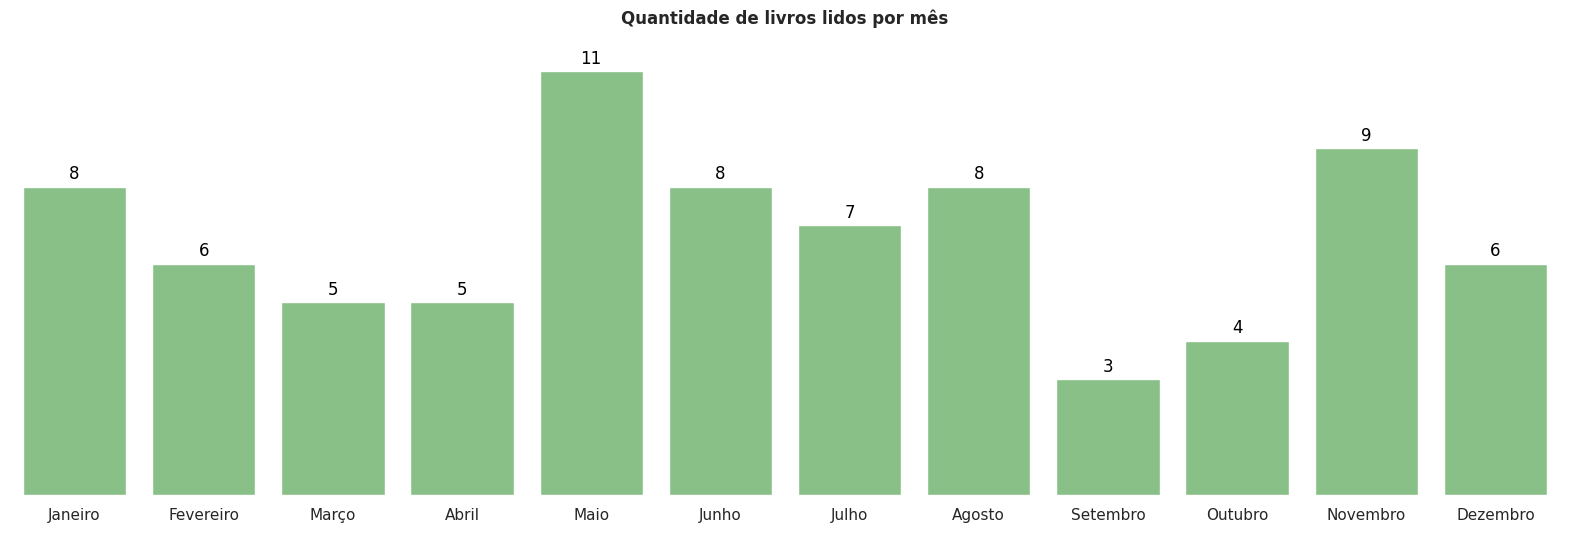

In [49]:
# Gráfico de barras com a quantidade de livros por mês
plt.figure(figsize = (20,6))
sns.set_theme(style = 'white', palette = 'Accent', context = 'notebook')

barras = sns.barplot(x = 'Mês', y = 'Quantidade', data = qtde_livros_mes)

barras.set_ylim([0,12])
plt.box(False)
plt.yticks([])
barras.set_ylabel('')
barras.set_xlabel('')

for barra in barras.patches: #imprimir o rótulo de cada barra, xy são as coordenadas para posicionamento do rótulo, xytext é o deslocamento do rótulo em relação à barra
  altura = barra.get_height()
  barras.annotate('{:.0f}'.format(altura), xy = (barra.get_x() + barra.get_width()/2,altura), xytext= (0,9), textcoords = 'offset points', ha = 'center', va= 'center', size = 12, color = 'black')

barras.set_title('Quantidade de livros lidos por mês', weight = 'bold')

plt.show()

**Quantidade de livros lidos por gênero**

In [42]:
qtde_livros_genero = livros_2024.groupby('Gênero')['Índice'].count().reset_index(name = 'Quantidade')
qtde_livros_genero_ordenado = qtde_livros_genero.sort_values(by ='Quantidade', ascending = False)
print(qtde_livros_genero_ordenado)

               Gênero  Quantidade
0       Contemporâneo          24
7            Memórias          14
2              Ficção          11
13           Thriller           8
4    Ficção Histórica           7
5   Ficção científica           3
6              Horror           3
8          Não ficção           2
10            Romance           2
12         Romantasia           2
1            Fantasia           1
3             Ficção            1
9     Realismo Mágico           1
11  Romance Histórico           1


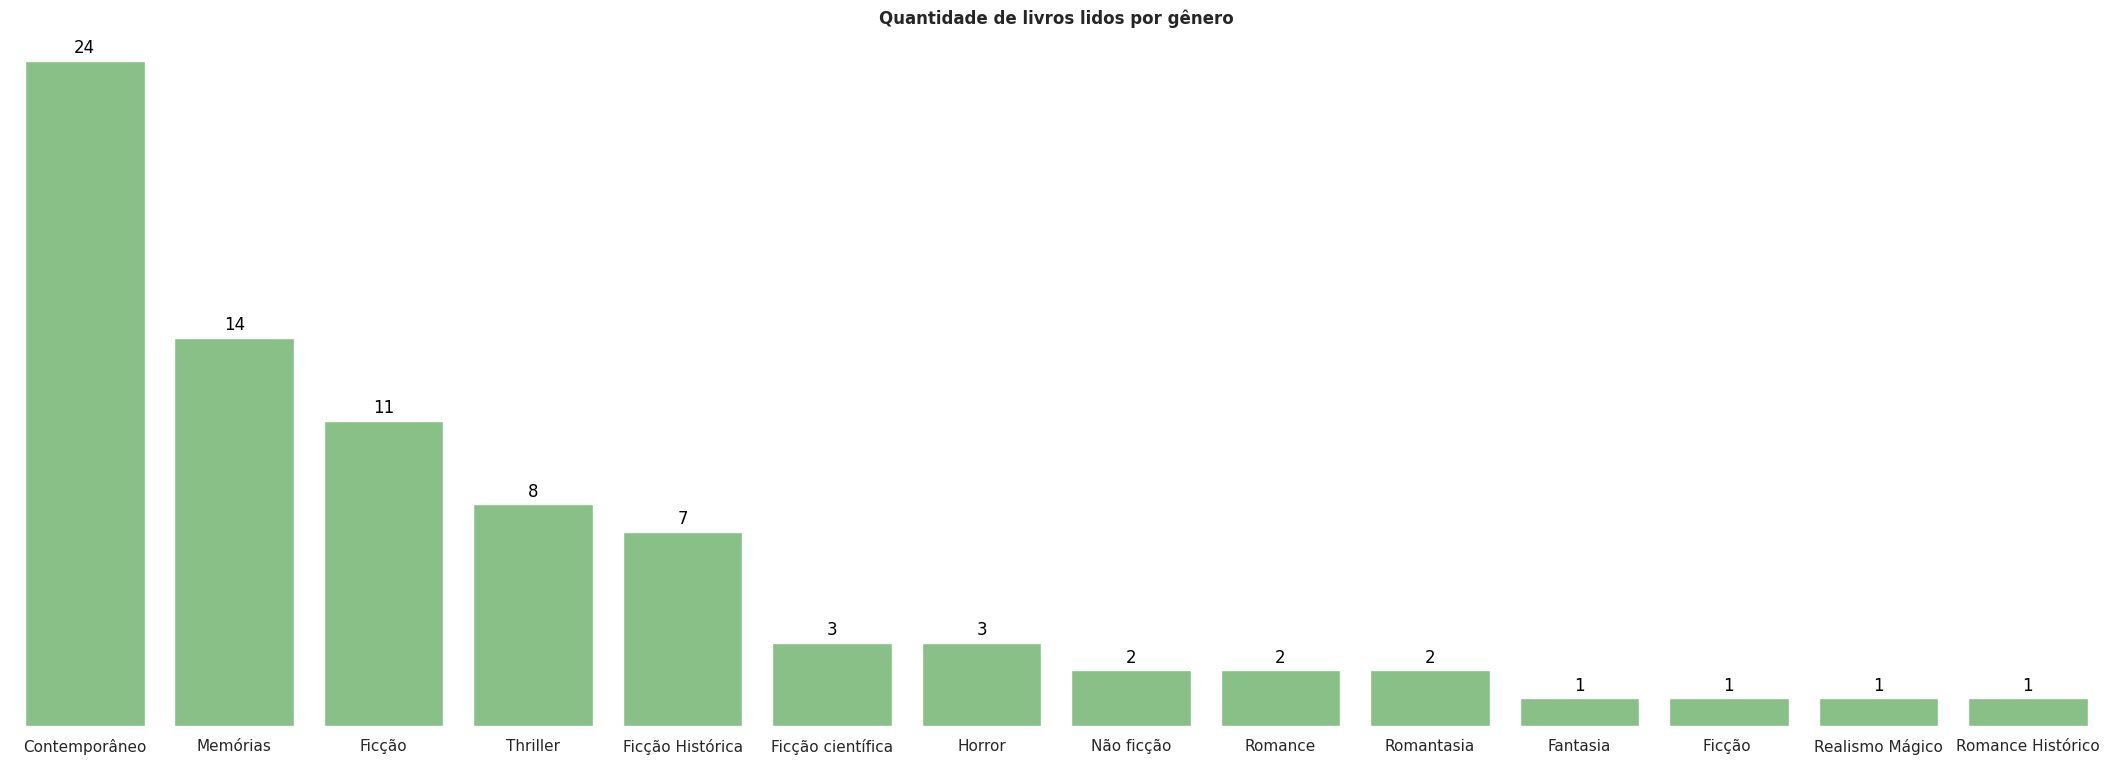

In [48]:
plt.figure(figsize = (27,9)) # mudar para barras horizontais
sns.set_theme(style = 'white', palette = 'Accent', context = 'notebook')

barras = sns.barplot(x = 'Gênero', y = 'Quantidade', data = qtde_livros_genero_ordenado)

barras.set_ylim([0,25])
plt.box(False)
plt.yticks([])
barras.set_ylabel('')
barras.set_xlabel('')

for barra in barras.patches: #imprimir o rótulo de cada barra, xy são as coordenadas para posicionamento do rótulo, xytext é o deslocamento do rótulo em relação à barra
  altura = barra.get_height()
  barras.annotate('{:.0f}'.format(altura), xy = (barra.get_x() + barra.get_width()/2,altura), xytext= (0,9), textcoords = 'offset points', ha = 'center', va= 'center', size = 12, color = 'black')

barras.set_title('Quantidade de livros lidos por gênero', weight = 'bold')
plt.show()

**Quantidade de livros lidos por editora**

In [44]:
qtde_livros_editora = livros_2024.groupby('Editora')['Índice'].count().reset_index(name = 'Quantidade')
qtde_livros_editora_ordenado = qtde_livros_editora.sort_values(by ='Quantidade', ascending = False)
print(qtde_livros_editora_ordenado)

            Editora  Quantidade
11       Intrínseca          13
5    Cia das Letras           7
20              TAG           6
6          Darkside           6
8           Fósforo           6
24            Verus           4
21          Todavia           4
18           Record           4
0         Alfaguara           3
15             Nemo           3
13     Morro Branco           3
7        Dublinense           3
3   Astral Cultural           3
1               Alt           2
16              Nós           2
10         Instante           1
12             LeYa           1
14         Mundaréu           1
9      Globo Livros           1
17         Paralela           1
19            Rocco           1
4          Bertrand           1
22      Tordesilhas           1
23            Trama           1
2          Amarcord           1
25         Vestígio           1


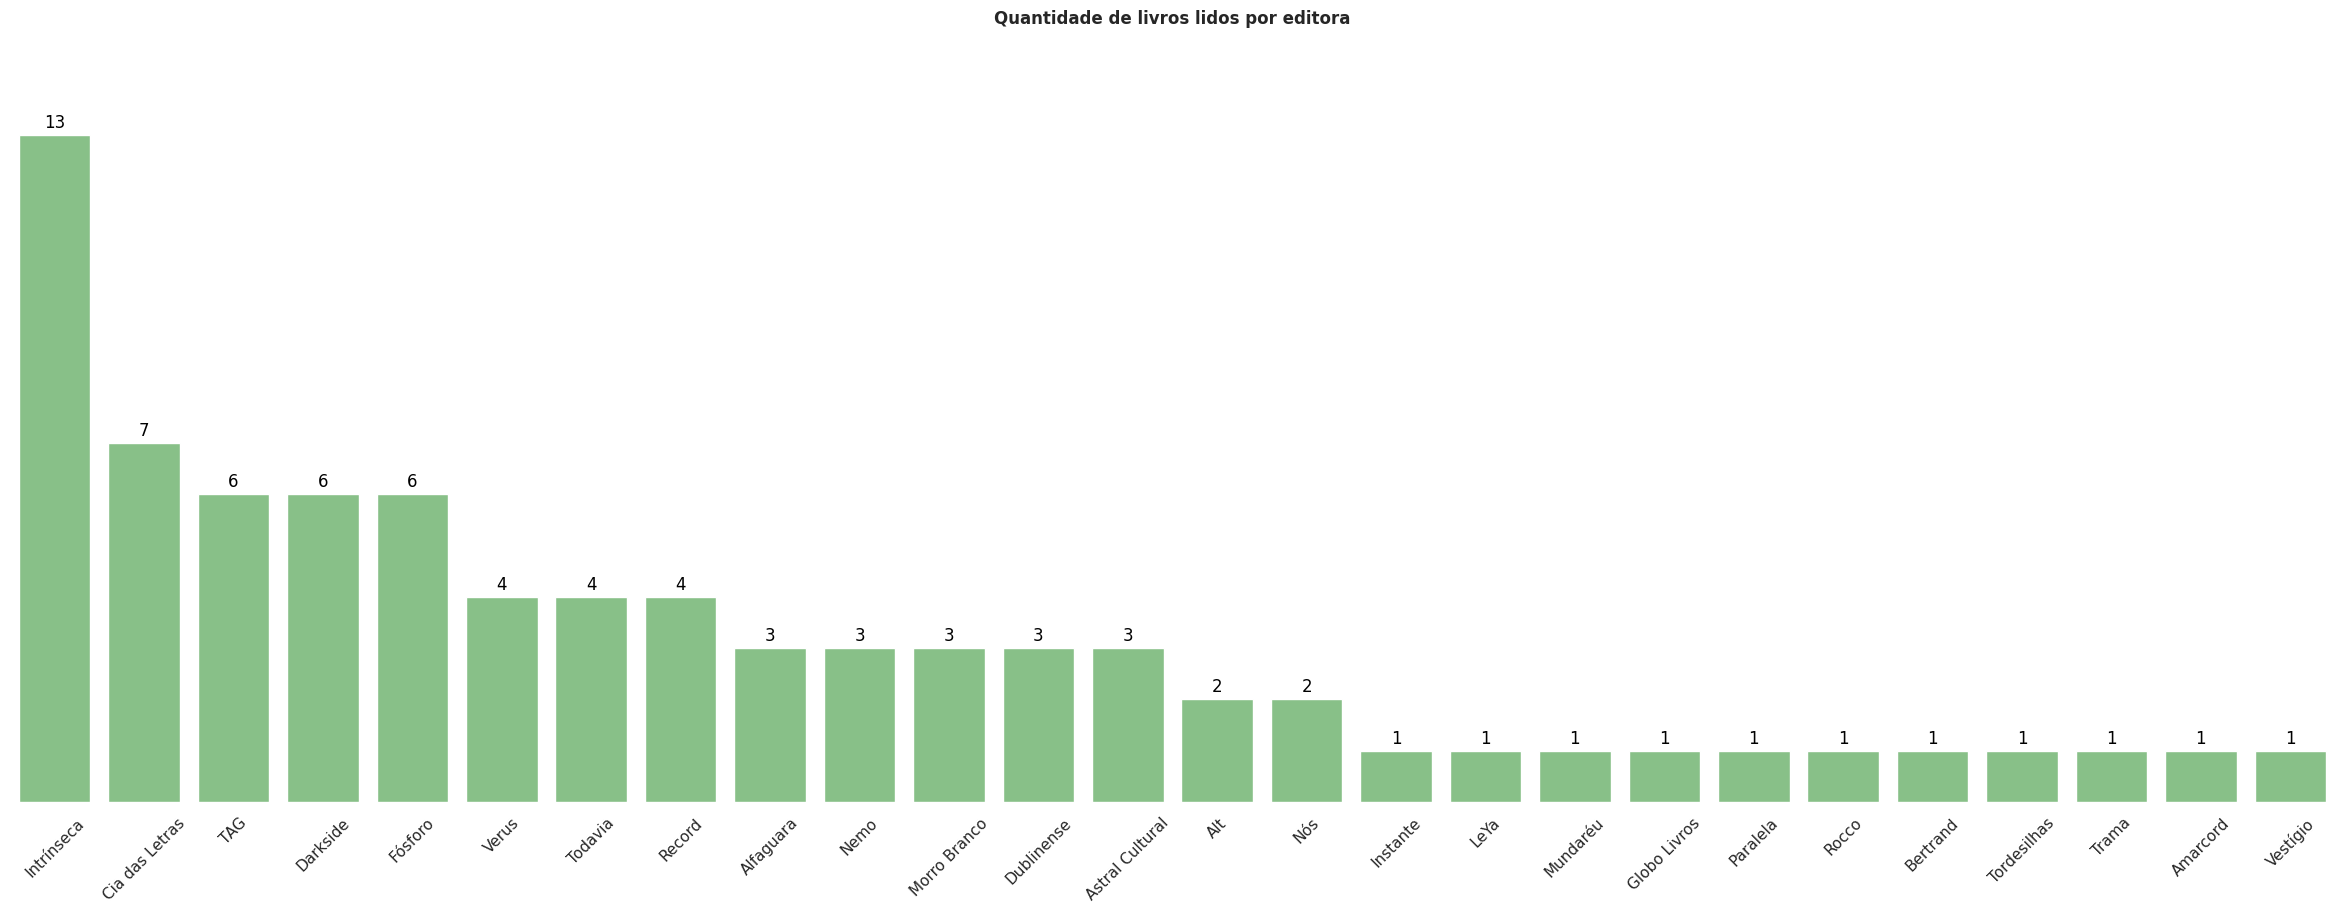

In [47]:
plt.figure(figsize = (30,10))
sns.set_theme(style = 'white', palette = 'Accent', context = 'notebook')

barras = sns.barplot(x = 'Editora', y = 'Quantidade', data = qtde_livros_editora_ordenado)
barras.set_ylim([0,15])
plt.xticks(rotation=45)
plt.box(False)
plt.yticks([])
barras.set_ylabel('')
barras.set_xlabel('')

for barra in barras.patches: #imprimir o rótulo de cada barra, xy são as coordenadas para posicionamento do rótulo, xytext é o deslocamento do rótulo em relação à barra
  altura = barra.get_height()
  barras.annotate('{:.0f}'.format(altura), xy = (barra.get_x() + barra.get_width()/2,altura), xytext= (0,9), textcoords = 'offset points', ha = 'center', va= 'center', size = 12, color = 'black')

barras.set_title('Quantidade de livros lidos por editora', weight = 'bold')
plt.show()

**Quantidade livros lidos por país**

In [50]:
qtde_livros_pais = livros_2024.groupby('País')['Índice'].count().reset_index(name = 'Quantidade')
qtde_livros_pais_ordenado = qtde_livros_pais.sort_values(by ='Quantidade', ascending = False)
print(qtde_livros_pais_ordenado)

                 País  Quantidade
11                EUA          25
4              Brasil          10
13             França          10
16         Inglaterra           5
12            Espanha           4
7               Chile           3
9            Colômbia           3
3           Argentina           2
6              Canadá           2
18             Itália           2
17            Irlanda           2
15            Hungria           1
21            Somália           1
20             Quênia           1
19            Polônia           1
0         Afeganistão           1
14               Gana           1
1            Alemanha           1
10      Coréia do Sul           1
8         China - EUA           1
5             Bélgica           1
2   Antígua e Barbuda           1
22          Sri Lanka           1


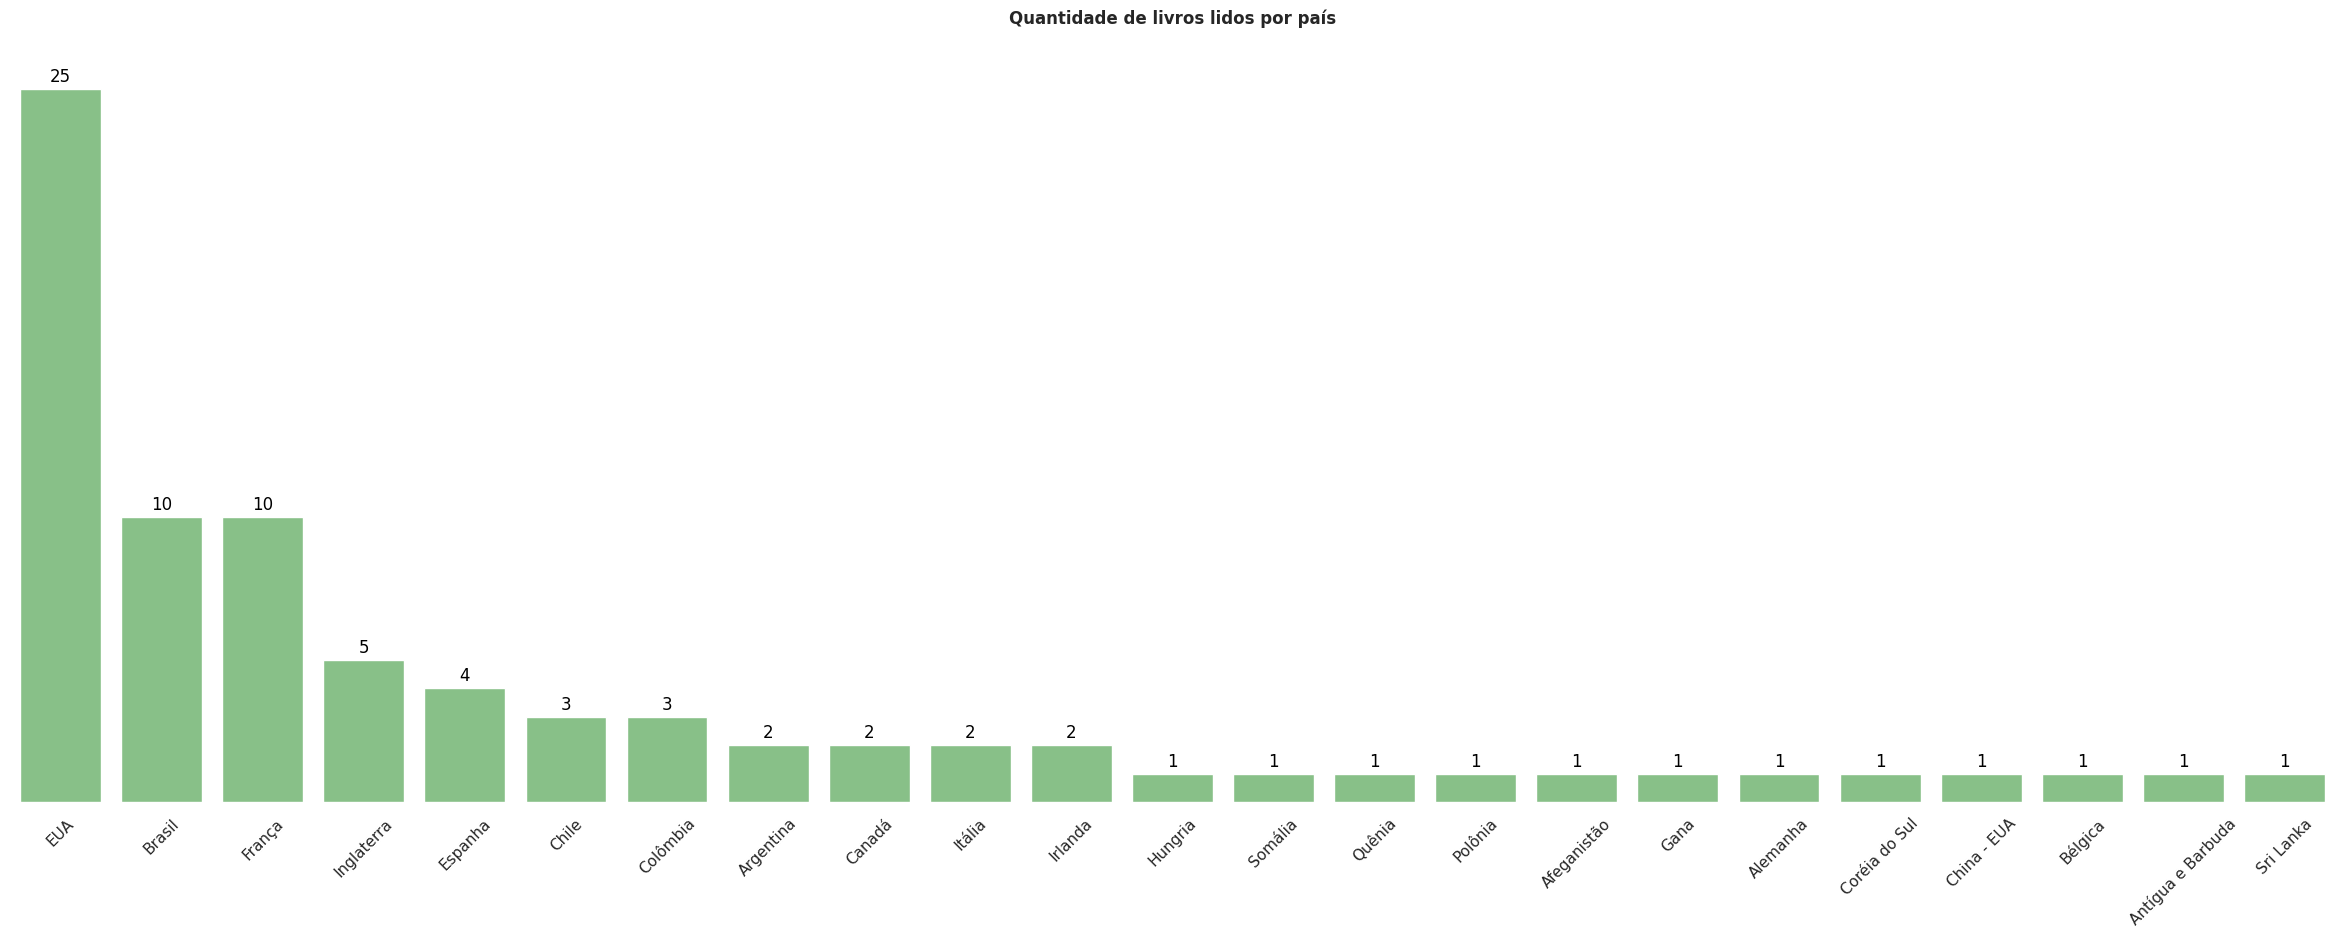

In [52]:
plt.figure(figsize = (30,10))
sns.set_theme(style = 'white', palette = 'Accent', context = 'notebook')

barras = sns.barplot(x = 'País', y = 'Quantidade', data = qtde_livros_pais_ordenado)
barras.set_ylim([0,27])
plt.xticks(rotation=45)
plt.box(False)
plt.yticks([])
barras.set_ylabel('')
barras.set_xlabel('')

for barra in barras.patches: #imprimir o rótulo de cada barra, xy são as coordenadas para posicionamento do rótulo, xytext é o deslocamento do rótulo em relação à barra
  altura = barra.get_height()
  barras.annotate('{:.0f}'.format(altura), xy = (barra.get_x() + barra.get_width()/2,altura), xytext= (0,9), textcoords = 'offset points', ha = 'center', va= 'center', size = 12, color = 'black')

barras.set_title('Quantidade de livros lidos por país', weight = 'bold')
plt.show()

**Média de páginas lidas por mês**

In [53]:
media_paginas_mes = livros_2024.groupby('Mês')['Páginas'].mean().reset_index(name = 'Média')
media_paginas_mes['Média'] = round(media_paginas_mes['Média'], 0)
print(media_paginas_mes)

          Mês  Média
0     Janeiro  334.0
1   Fevereiro  414.0
2       Março  377.0
3       Abril  324.0
4        Maio  296.0
5       Junho  283.0
6       Julho  385.0
7      Agosto  160.0
8    Setembro  310.0
9     Outubro  212.0
10   Novembro  273.0
11   Dezembro  241.0


<ipython-input-53-641719f20a75>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_paginas_mes = livros_2024.groupby('Mês')['Páginas'].mean().reset_index(name = 'Média')


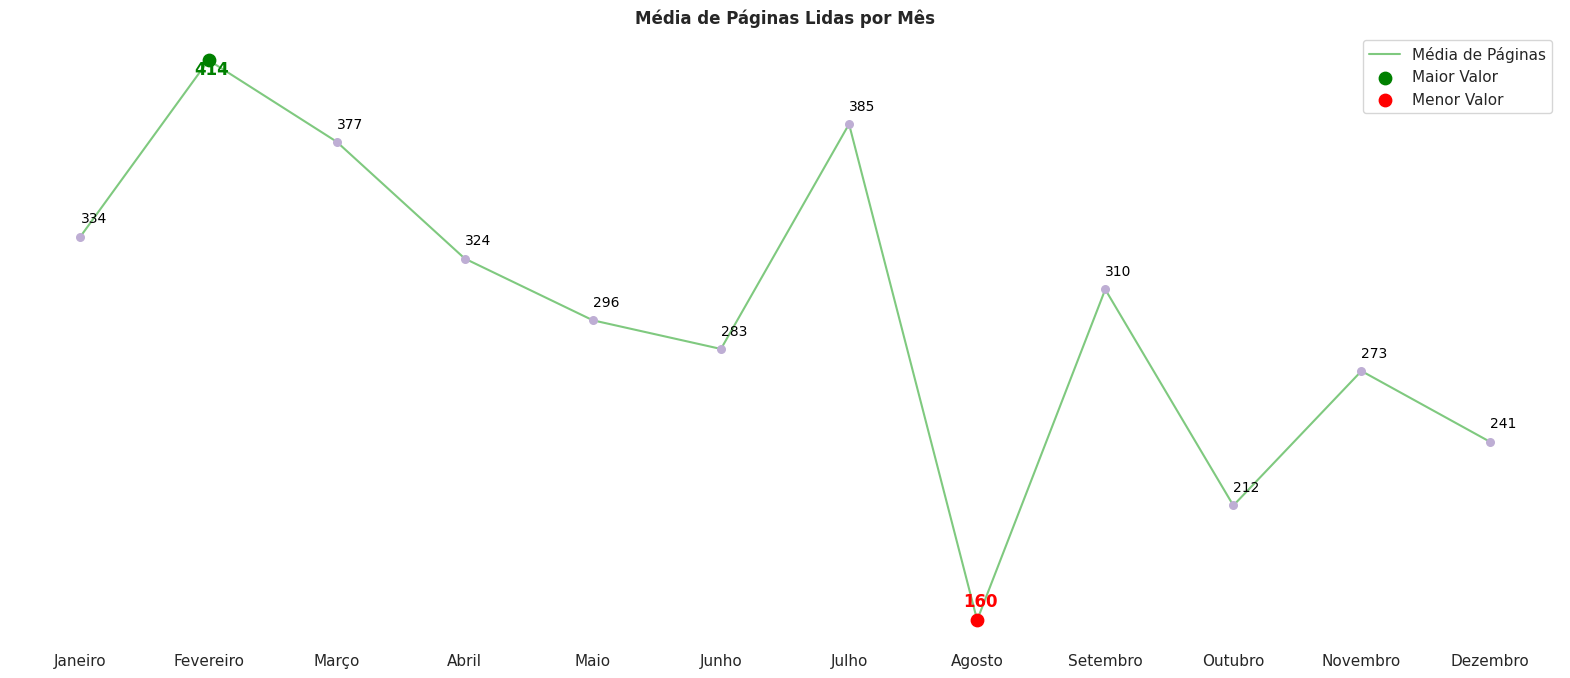

In [99]:
import matplotlib.pyplot as plt
from cycler import cycler

cores = plt.get_cmap('Accent').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(20, 8))
plt.plot(media_paginas_mes['Mês'], media_paginas_mes['Média'], color=cores[0], label='Média de Páginas')


min_valor = media_paginas_mes['Média'].min()
min_posicao = media_paginas_mes['Média'].idxmin()
max_valor = media_paginas_mes['Média'].max()
max_posicao = media_paginas_mes['Média'].idxmax()

# Adicionar marcadores
for i, valor in enumerate(media_paginas_mes['Média']):
    if i == min_posicao:  # Marcador para o menor valor
        plt.scatter(
            x=media_paginas_mes['Mês'][i],
            y=valor,
            color='red',
            s=80,
            label='Menor Valor',
            zorder=5,
        )
        plt.annotate(
            f'{valor:.0f}',
            xy=(media_paginas_mes['Mês'][i], valor),
            xytext=(-10, 10),
            textcoords='offset points',
            color='red',
            weight='bold',
        )
    elif i == max_posicao:  # Marcador para o maior valor
        plt.scatter(
            x=media_paginas_mes['Mês'][i],
            y=valor,
            color='green',
            s=80,
            label='Maior Valor',
            zorder=5,
        )
        plt.annotate(
            f'{valor:.0f}',
            xy=(media_paginas_mes['Mês'][i], valor),
            xytext=(-10, -10),
            textcoords='offset points',
            color='green',
            weight='bold',
        )
     # Rótulos para os demais meses
    else:
        plt.annotate(
            f'{valor:.0f}',
            xy=(media_paginas_mes['Mês'][i], valor),
            xytext=(0, 10),
            textcoords='offset points',
            color='black',
            fontsize=10,
        )
        plt.scatter(
            x=media_paginas_mes['Mês'][i],
            y=valor,
            color=cores[1],
            s=30,
            zorder=5,
        )


plt.yticks([])
plt.tick_params(axis='x', length=0)
plt.box(False)
plt.ylabel('')
plt.title('Média de Páginas Lidas por Mês', weight = 'bold')
plt.legend()
plt.show()


**Média de páginas por gênero**

In [5]:
media_paginas_genero = round(livros_2024.groupby('Gênero')['Páginas'].mean().reset_index(name = 'Média'), 0)
media_paginas_genero_ordenado = media_paginas_genero.sort_values(by ='Média', ascending = True)
print(media_paginas_genero_ordenado)

               Gênero  Média
3             Ficção   136.0
6              Horror  141.0
5   Ficção científica  171.0
7            Memórias  198.0
2              Ficção  259.0
0       Contemporâneo  310.0
13           Thriller  344.0
8          Não ficção  352.0
11  Romance Histórico  368.0
4    Ficção Histórica  425.0
10            Romance  434.0
9     Realismo Mágico  448.0
12         Romantasia  508.0
1            Fantasia  592.0


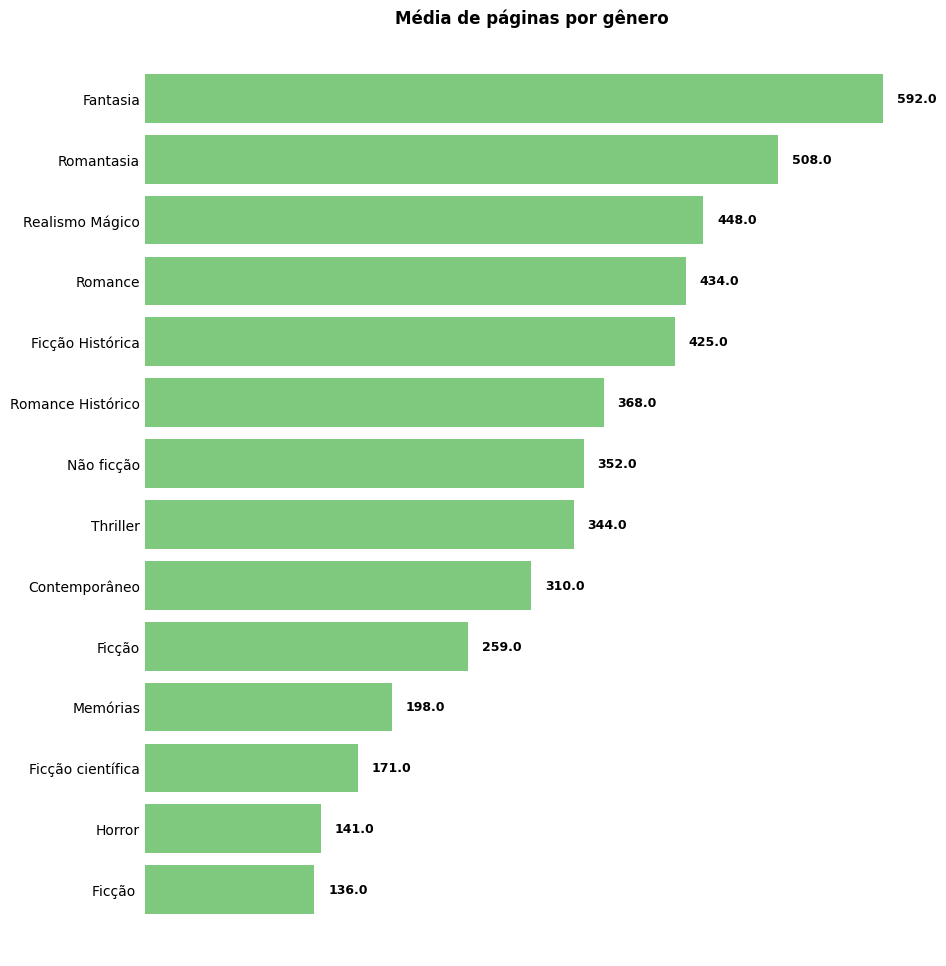

In [6]:
import matplotlib.pyplot as plt
from cycler import cycler

cor_barra = plt.get_cmap('Accent').colors
ciclo_barras = cycler('color', cor_barra)
plt.rc('axes', prop_cycle= ciclo_barras)

plt.figure(figsize=(10,12))

barras = plt.barh(media_paginas_genero_ordenado['Gênero'], media_paginas_genero_ordenado['Média'])
plt.bar_label(barras, labels = media_paginas_genero_ordenado['Média'], padding= 10, fontsize=9, fontweight='bold')
plt.box(False)

plt.xticks([]) #nenhum valor associado ao eixo x
plt.tick_params(axis= 'y', length= 0)

plt.title('Média de páginas por gênero', weight = 'bold')
plt.show()

**Média de dias de leitura por gênero**

In [7]:
media_dias_genero = round(livros_2024.groupby('Gênero')['Dias de Leitura'].mean().reset_index(name = 'Média'), 0)
media_dias_genero_ordenado = media_dias_genero.sort_values(by ='Média', ascending = True)
print(media_dias_genero_ordenado)

               Gênero  Média
3             Ficção     2.0
6              Horror    2.0
7            Memórias    2.0
5   Ficção científica    3.0
11  Romance Histórico    3.0
0       Contemporâneo    5.0
2              Ficção    5.0
4    Ficção Histórica    5.0
13           Thriller    5.0
9     Realismo Mágico    6.0
10            Romance    6.0
8          Não ficção    7.0
12         Romantasia    7.0
1            Fantasia    8.0


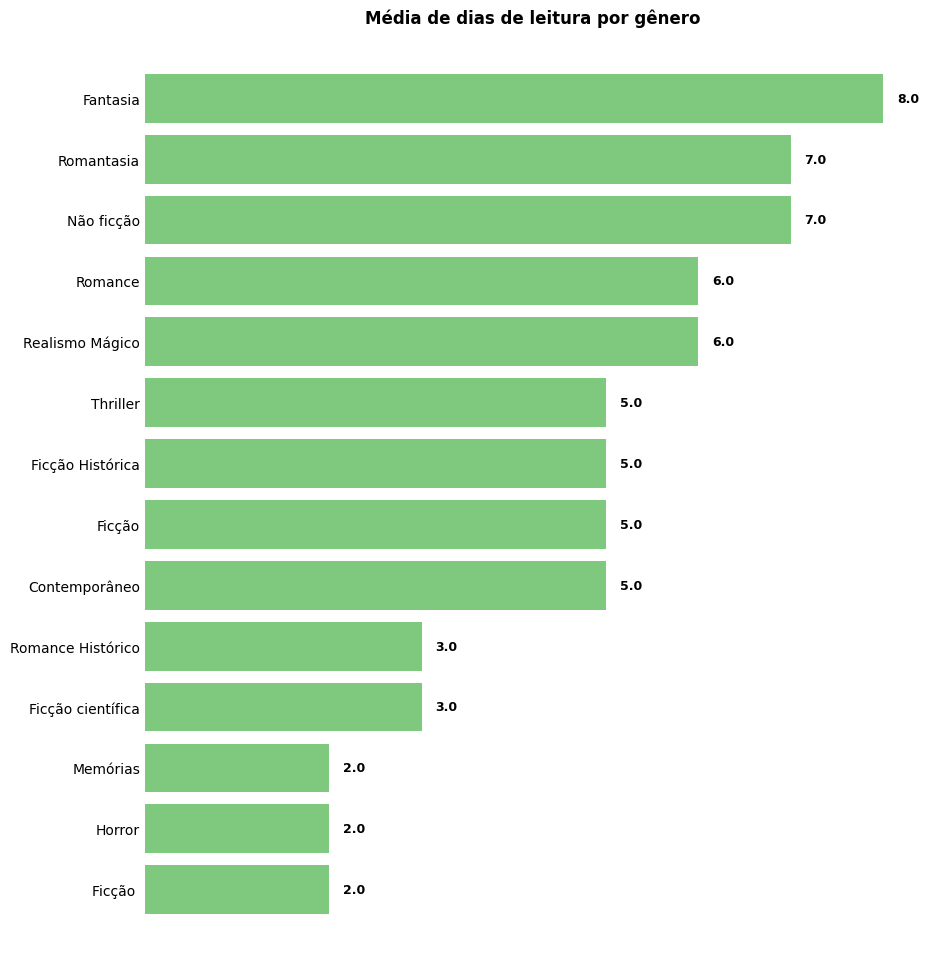

In [8]:
import matplotlib.pyplot as plt
from cycler import cycler

cor_barra = plt.get_cmap('Accent').colors
ciclo_barras = cycler('color', cor_barra)
plt.rc('axes', prop_cycle= ciclo_barras)

plt.figure(figsize=(10,12))

barras = plt.barh(media_dias_genero_ordenado['Gênero'], media_dias_genero_ordenado['Média'])
plt.bar_label(barras, labels = media_dias_genero_ordenado['Média'], padding= 10, fontsize=9, fontweight='bold')
plt.box(False)

plt.xticks([]) #nenhum valor associado ao eixo x
plt.tick_params(axis= 'y', length= 0)

plt.title('Média de dias de leitura por gênero', weight = 'bold')
plt.show()

**Média de notas por gênero**

In [9]:
media_notas_genero = round(livros_2024.groupby('Gênero')['Nota'].mean().reset_index(name = 'Média'), 0)
media_notas_genero_ordenado = media_notas_genero.sort_values(by ='Média', ascending = True)
print(media_notas_genero_ordenado)

               Gênero  Média
11  Romance Histórico    2.0
2              Ficção    3.0
3             Ficção     3.0
4    Ficção Histórica    3.0
6              Horror    3.0
12         Romantasia    3.0
13           Thriller    3.0
0       Contemporâneo    4.0
1            Fantasia    4.0
5   Ficção científica    4.0
7            Memórias    4.0
8          Não ficção    4.0
9     Realismo Mágico    4.0
10            Romance    4.0


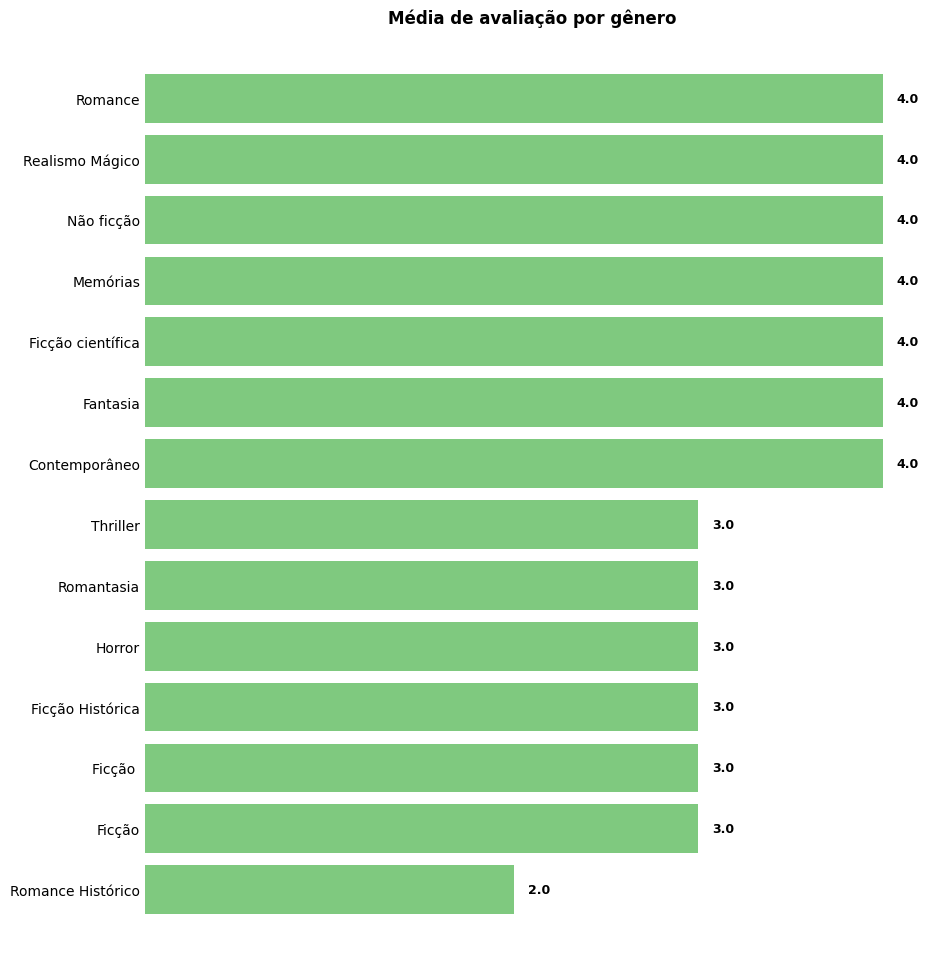

In [10]:
import matplotlib.pyplot as plt
from cycler import cycler

cor_barra = plt.get_cmap('Accent').colors
ciclo_barras = cycler('color', cor_barra)
plt.rc('axes', prop_cycle= ciclo_barras)

plt.figure(figsize=(10,12))

barras = plt.barh(media_notas_genero_ordenado['Gênero'], media_notas_genero_ordenado['Média'])
plt.bar_label(barras, labels = media_notas_genero_ordenado['Média'], padding= 10, fontsize=9, fontweight='bold')
plt.box(False)

plt.xticks([]) #nenhum valor associado ao eixo x
plt.tick_params(axis= 'y', length= 0)

plt.title('Média de avaliação por gênero', weight = 'bold')
plt.show()

**Média de nota por editora**

In [11]:
media_notas_editora = round(livros_2024.groupby('Editora')['Nota'].mean().reset_index(name = 'Média'), 0)
media_notas_editora_ordenado = media_notas_editora.sort_values(by ='Média', ascending = False)
print(media_notas_editora_ordenado)

            Editora  Média
15             Nemo    5.0
13     Morro Branco    4.0
11       Intrínseca    4.0
24            Verus    4.0
23            Trama    4.0
21          Todavia    4.0
19            Rocco    4.0
17         Paralela    4.0
16              Nós    4.0
12             LeYa    4.0
25         Vestígio    4.0
9      Globo Livros    4.0
8           Fósforo    4.0
7        Dublinense    4.0
5    Cia das Letras    4.0
3   Astral Cultural    4.0
2          Amarcord    4.0
10         Instante    3.0
1               Alt    3.0
14         Mundaréu    3.0
6          Darkside    3.0
18           Record    3.0
20              TAG    3.0
4          Bertrand    3.0
22      Tordesilhas    3.0
0         Alfaguara    3.0


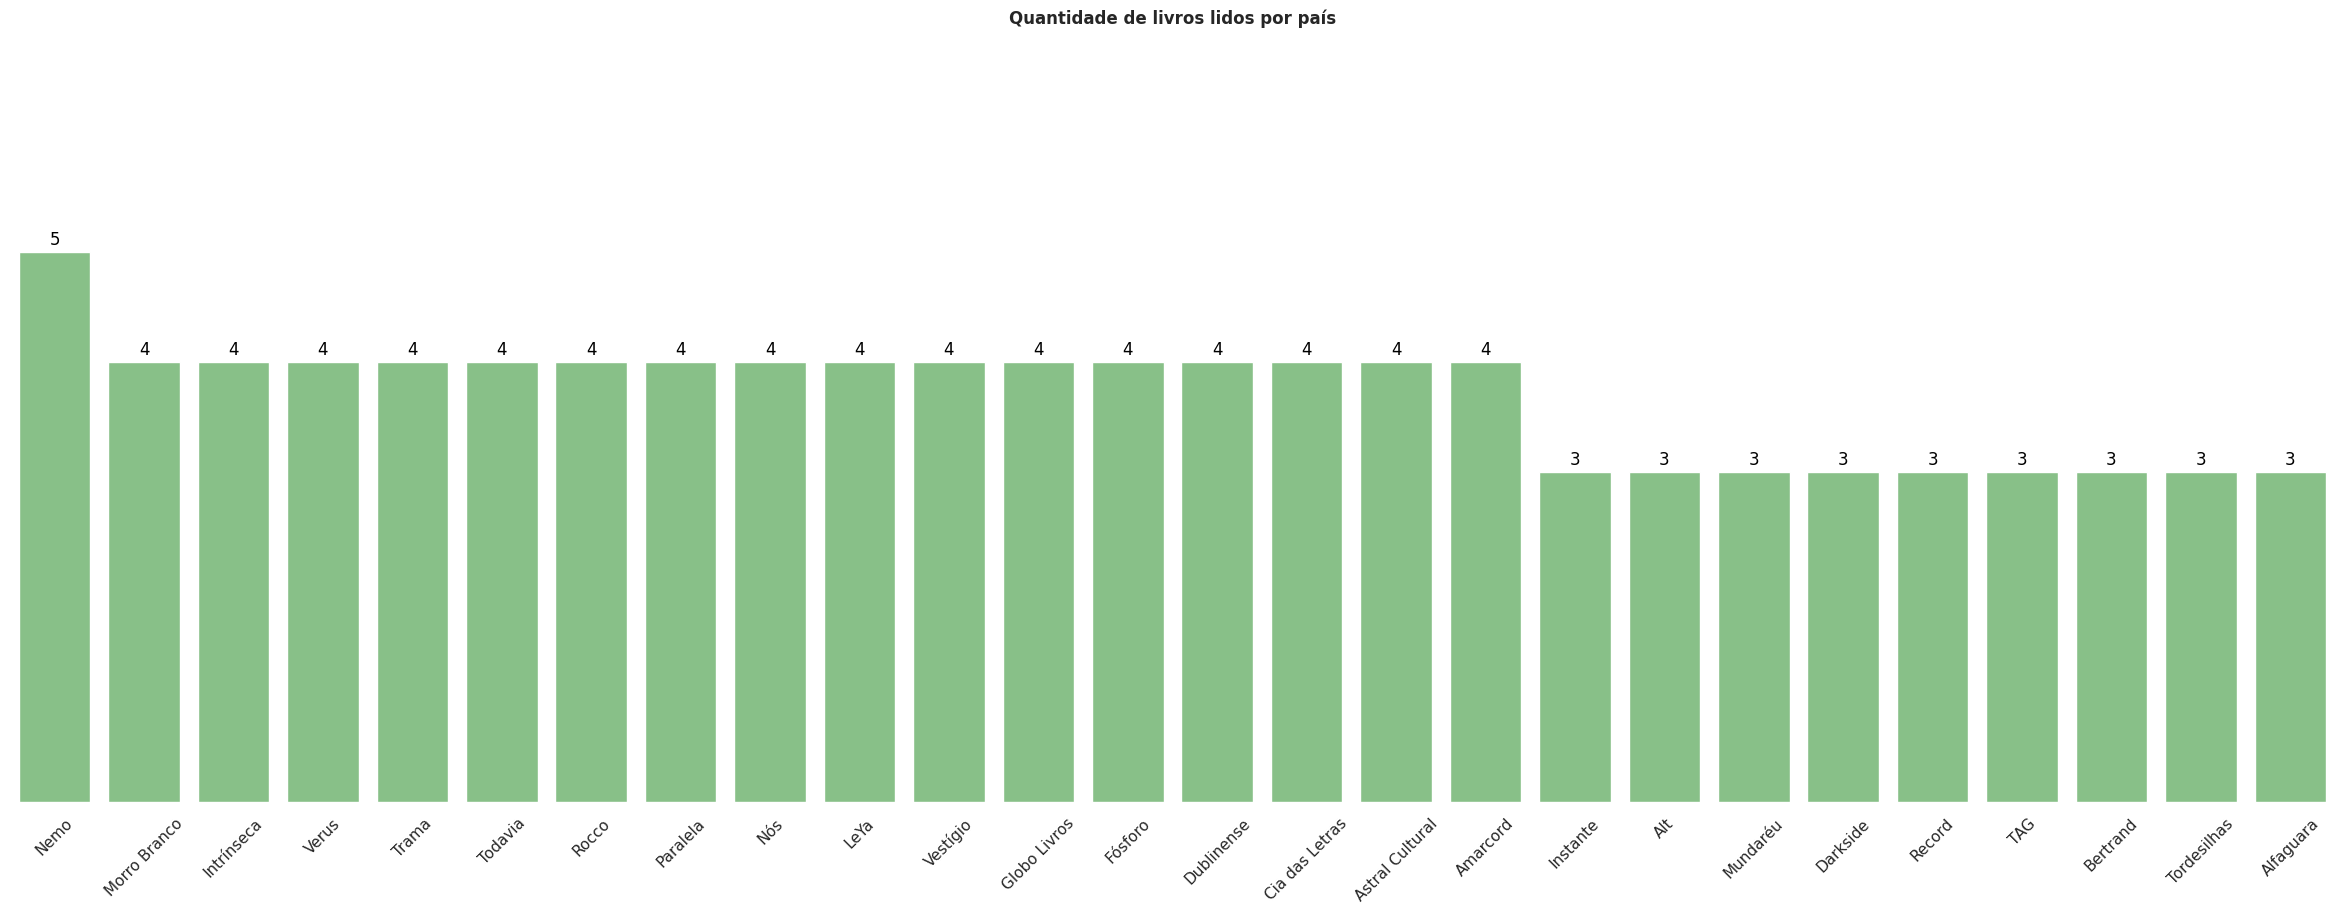

In [105]:
plt.figure(figsize = (30,10))
sns.set_theme(style = 'white', palette = 'Accent', context = 'notebook')

barras = sns.barplot(x = 'Editora', y = 'Média', data = media_notas_editora_ordenado)
barras.set_ylim([0,7])
plt.xticks(rotation=45)
plt.box(False)
plt.yticks([])
barras.set_ylabel('')
barras.set_xlabel('')

for barra in barras.patches: #imprimir o rótulo de cada barra, xy são as coordenadas para posicionamento do rótulo, xytext é o deslocamento do rótulo em relação à barra
  altura = barra.get_height()
  barras.annotate('{:.0f}'.format(altura), xy = (barra.get_x() + barra.get_width()/2,altura), xytext= (0,9), textcoords = 'offset points', ha = 'center', va= 'center', size = 12, color = 'black')

barras.set_title('Quantidade de livros lidos por país', weight = 'bold')
plt.show()

**Ranking de livros com as maiores notas**

In [119]:
filtro_notas = livros_2024[livros_2024['Nota']>4]
livros_ordenados = filtro_notas.sort_values(by='Nota', ascending=False)
print(livros_ordenados)

    Índice                               Título  Páginas Data Início  \
1        2                              Pageboy      288  2024-05-01   
5        6                  A sociedade da neve      416         NaT   
17      18                               Infiel      320         NaT   
51      52                           Uma mulher       80  2024-02-08   
64      65                  A odisseia de Hakim      272         NaT   
70      71           A odisseia de Hakim vol. 2      264         NaT   
71      72           A odisseia de Hakim vol. 3      256         NaT   
12      13                                Babel      592         NaT   
23      24                         Os sussurros      352         NaT   
28      29                         Nem te conto      448  2024-06-05   
37      38                        As irmãs Blue      400  2024-12-06   
45      46  Amanhã, amanhã e ainda outro amanhã      400  2024-09-07   
48      49                    O caminho de casa      448        

<ipython-input-123-0de6783aeb57>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nota', y='Livro e Autor', data=livros_ordenados, palette='Set3')


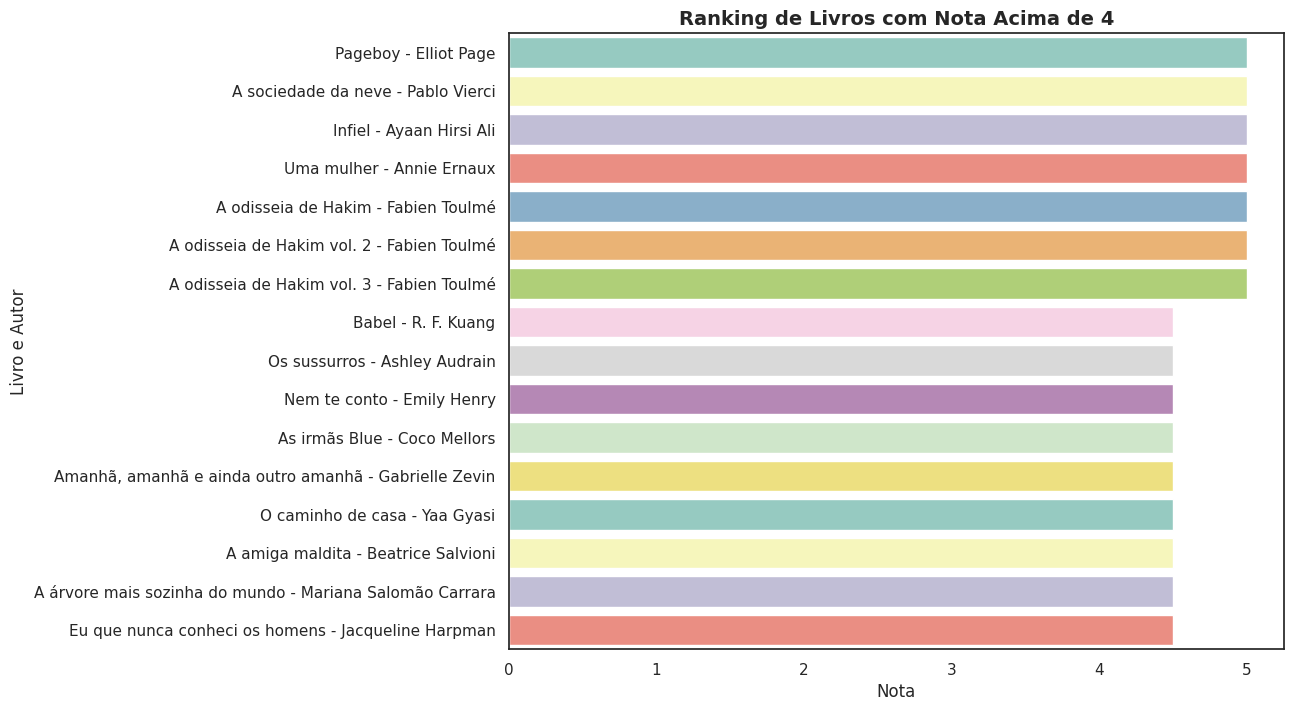

In [123]:
livros_ordenados['Livro e Autor'] = livros_ordenados['Título'] + ' - ' + livros_ordenados['Autor']

plt.figure(figsize=(10, 8))
sns.barplot(x='Nota', y='Livro e Autor', data=livros_ordenados, palette='Set3')

plt.title('Ranking de Livros com Nota Acima de 4', fontsize=14, weight='bold')
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Livro e Autor', fontsize=12)
plt.show()

**Total de páginas lidas por mês**

In [107]:
total_paginas_mes = livros_2024.groupby('Mês')['Páginas'].sum().reset_index(name = 'Total')
print(total_paginas_mes)

          Mês  Total
0     Janeiro   2676
1   Fevereiro   2486
2       Março   1887
3       Abril   1618
4        Maio   3261
5       Junho   2264
6       Julho   2698
7      Agosto   1284
8    Setembro    930
9     Outubro    849
10   Novembro   2456
11   Dezembro   1448


<ipython-input-107-6e1dc261cbe3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_paginas_mes = livros_2024.groupby('Mês')['Páginas'].sum().reset_index(name = 'Total')


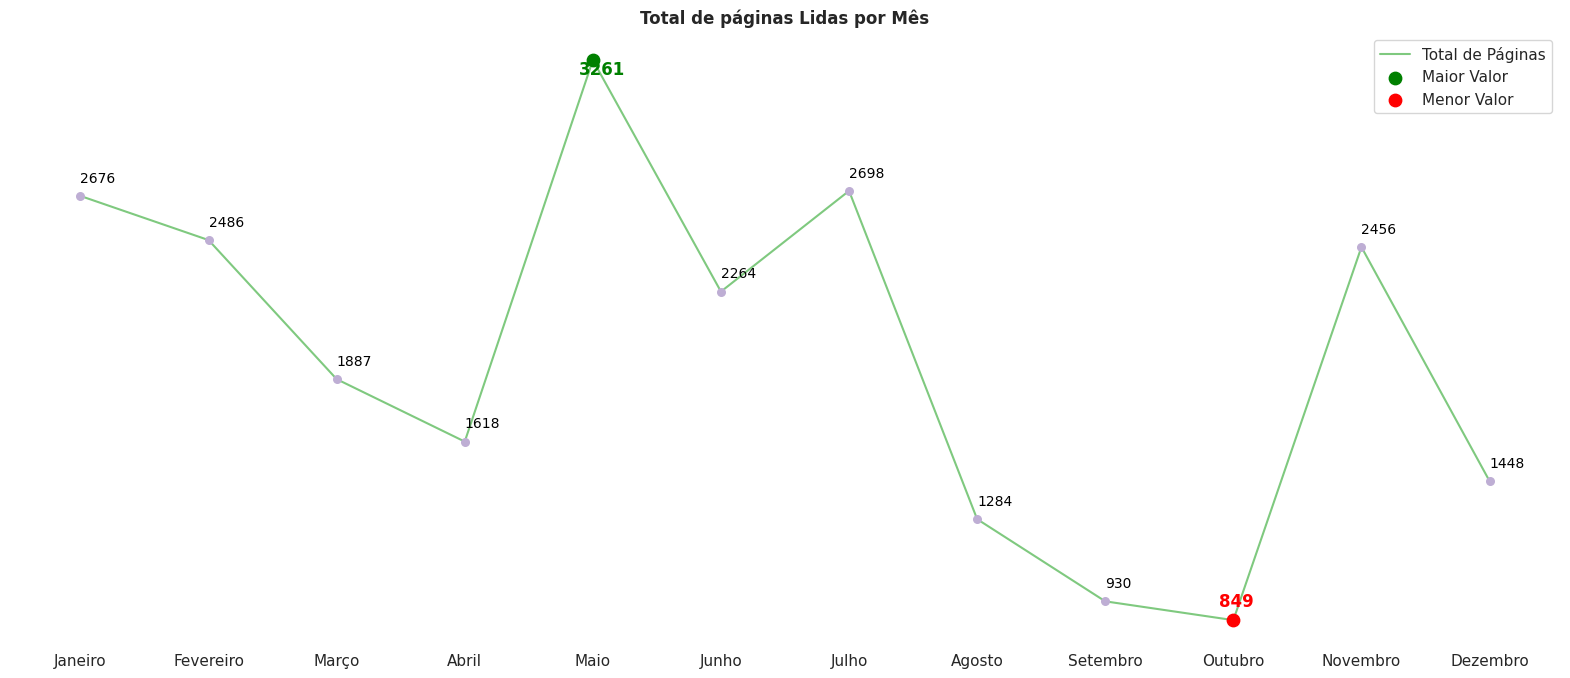

In [108]:
import matplotlib.pyplot as plt
from cycler import cycler

cores = plt.get_cmap('Accent').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(20, 8))
plt.plot(total_paginas_mes['Mês'], total_paginas_mes['Total'], color=cores[0], label='Total de Páginas')


min_valor = total_paginas_mes['Total'].min()
min_posicao = total_paginas_mes['Total'].idxmin()
max_valor = total_paginas_mes['Total'].max()
max_posicao = total_paginas_mes['Total'].idxmax()

# Adicionar marcadores
for i, valor in enumerate(total_paginas_mes['Total']):
    if i == min_posicao:  # Marcador para o menor valor
        plt.scatter(
            x=media_paginas_mes['Mês'][i],
            y=valor,
            color='red',
            s=80,
            label='Menor Valor',
            zorder=5,
        )
        plt.annotate(
            f'{valor:.0f}',
            xy=(media_paginas_mes['Mês'][i], valor),
            xytext=(-10, 10),
            textcoords='offset points',
            color='red',
            weight='bold',
        )
    elif i == max_posicao:  # Marcador para o maior valor
        plt.scatter(
            x=media_paginas_mes['Mês'][i],
            y=valor,
            color='green',
            s=80,
            label='Maior Valor',
            zorder=5,
        )
        plt.annotate(
            f'{valor:.0f}',
            xy=(media_paginas_mes['Mês'][i], valor),
            xytext=(-10, -10),
            textcoords='offset points',
            color='green',
            weight='bold',
        )
     # Rótulos para os demais meses
    else:
        plt.annotate(
            f'{valor:.0f}',
            xy=(media_paginas_mes['Mês'][i], valor),
            xytext=(0, 10),
            textcoords='offset points',
            color='black',
            fontsize=10,
        )
        plt.scatter(
            x=media_paginas_mes['Mês'][i],
            y=valor,
            color=cores[1],
            s=30,
            zorder=5,
        )


plt.yticks([])
plt.tick_params(axis='x', length=0)
plt.box(False)
plt.ylabel('')
plt.title('Total de páginas Lidas por Mês', weight = 'bold')
plt.legend()
plt.show()

**Quantidade de livros lidos por formato**

In [12]:
qtde_livros_formato = livros_2024.groupby('Formato')['Índice'].count().reset_index(name = 'Quantidade')
qtde_livros_formato_ordenado = qtde_livros_formato.sort_values(by ='Quantidade', ascending = False)
print(qtde_livros_formato_ordenado)


  Formato  Quantidade
0   Ebook          62
1  Físico          18


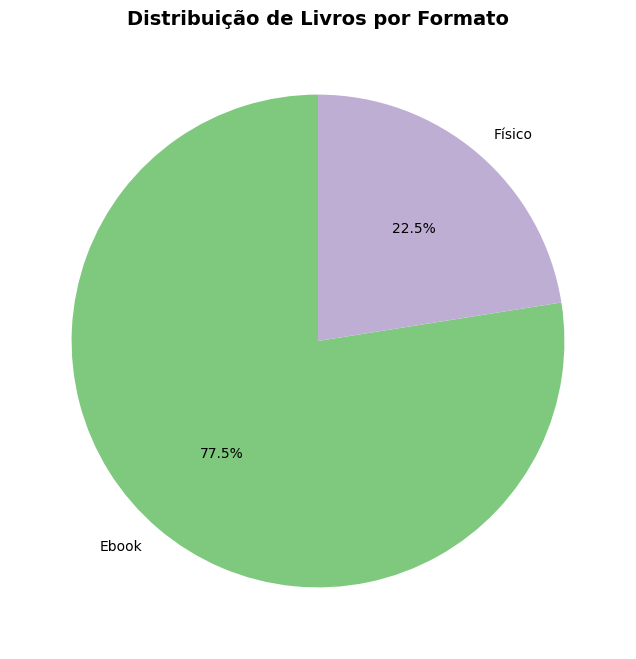

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(qtde_livros_formato_ordenado['Quantidade'], labels=qtde_livros_formato_ordenado['Formato'],
        autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Accent').colors)

plt.title('Distribuição de Livros por Formato', fontsize=14, weight='bold')

plt.show()

**Quantidade de livros por nota**

In [109]:
qtde_livros_nota = livros_2024.groupby('Nota')['Índice'].count().reset_index(name = 'Total')
print(qtde_livros_nota)

   Nota  Total
0   2.0      5
1   2.5      3
2   3.0     18
3   3.5     18
4   4.0     20
5   4.5      9
6   5.0      7


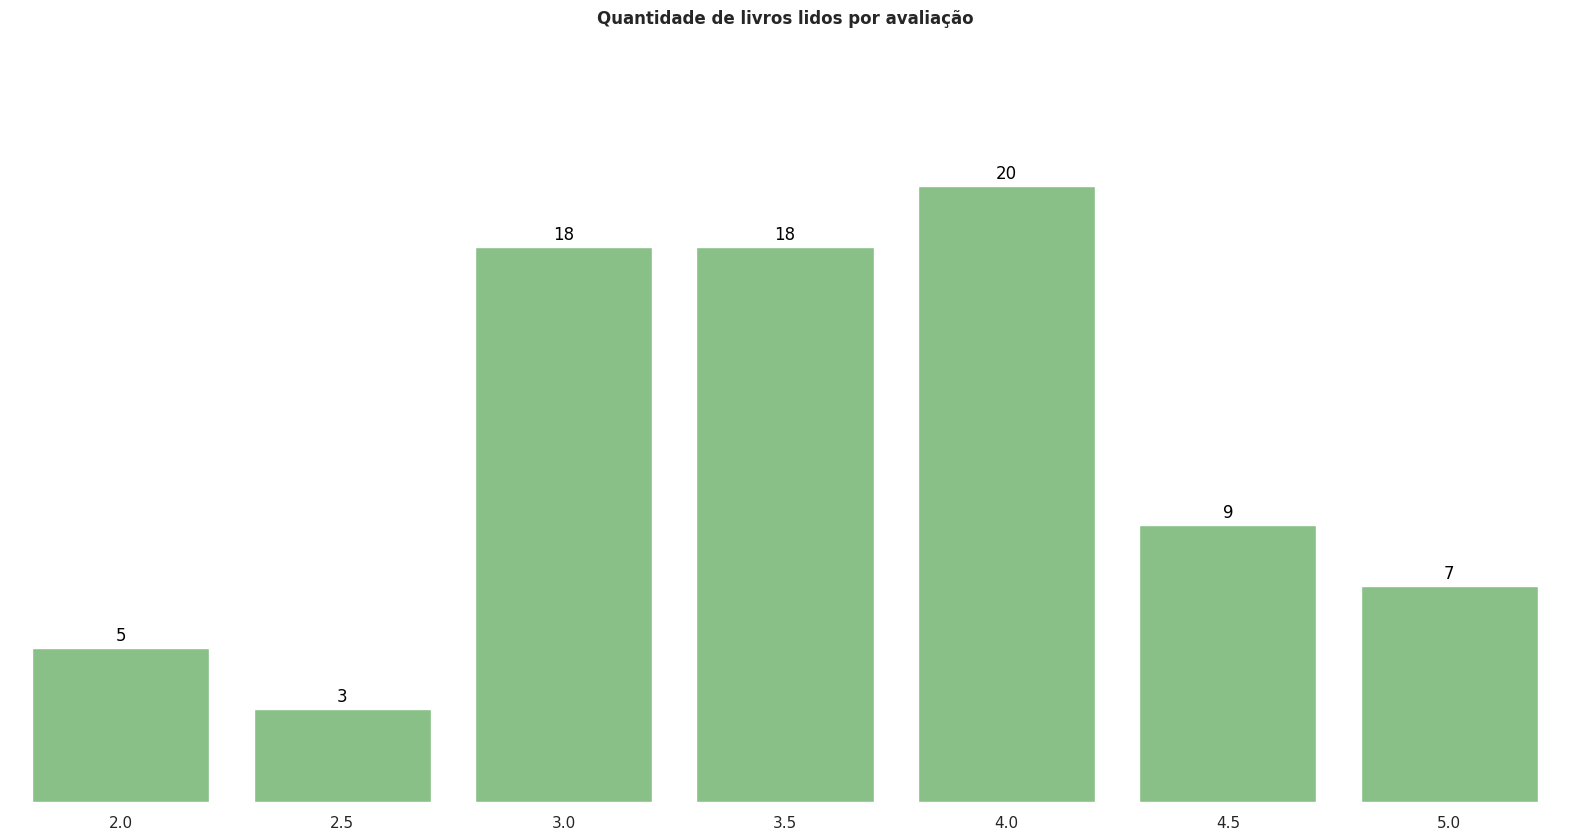

In [118]:
plt.figure(figsize = (20,10))
sns.set_theme(style = 'white', palette = 'Accent', context = 'notebook')

barras = sns.barplot(x = 'Nota', y = 'Total', data = qtde_livros_nota)
barras.set_ylim([0,25])
plt.box(False)
plt.yticks([])
barras.set_ylabel('')
barras.set_xlabel('')

for barra in barras.patches: #imprimir o rótulo de cada barra, xy são as coordenadas para posicionamento do rótulo, xytext é o deslocamento do rótulo em relação à barra
  altura = barra.get_height()
  barras.annotate('{:.0f}'.format(altura), xy = (barra.get_x() + barra.get_width()/2,altura), xytext= (0,9), textcoords = 'offset points', ha = 'center', va= 'center', size = 12, color = 'black')

barras.set_title('Quantidade de livros lidos por avaliação', weight = 'bold')
plt.show()

**Total de páginas lidas no ano**

In [ ]:
total_paginas_lidas = livros_2024['Páginas'].sum()
print(f'O total de páginas lidas no ano foi de: {total_paginas_lidas} páginas.')

O total de páginas lidas no ano foi de: 23857 páginas.


**Média de nota**

In [ ]:
media_avaliacoes = livros_2024['Nota'].mean()
print(f'A média de avaliações é de: {media_avaliacoes} estrelas.')

A média de avaliações é de: 3.625 estrelas.


**Livro com maior e o menor número de páginas**

In [ ]:
indice_livro_maior_paginas = livros_2024['Páginas'].idxmax()
maior_numero_paginas = livros_2024.loc[indice_livro_maior_paginas]
print(maior_numero_paginas)

Índice                                13
Título                             Babel
Páginas                              592
Data Início          2024-02-13 00:00:00
Data Fim             2024-02-20 00:00:00
Mês                            Fevereiro
Dias de Leitura                        8
Gênero                          Fantasia
Formato                            Ebook
Editora                       Intrínseca
Ano de Lançamento                   2024
Série ou Único               Livro único
Autor                        R. F. Kuang
Etnia                     Sino-americana
País                         China - EUA
Nota                                 4.5
Name: 12, dtype: object


In [ ]:
indice_livro_menor_paginas = livros_2024['Páginas'].idxmin()
menor_numero_paginas = livros_2024.loc[indice_livro_menor_paginas]
print(menor_numero_paginas)

Índice                                63
Título                      Sons da fala
Páginas                               33
Data Início          2024-10-13 00:00:00
Data Fim             2024-10-13 00:00:00
Mês                              Outubro
Dias de Leitura                        1
Gênero                 Ficção científica
Formato                            Ebook
Editora                     Morro Branco
Ano de Lançamento                   2019
Série ou Único                     Conto
Autor                  Octavia E. Butler
Etnia                     Afro-americana
País                                 EUA
Nota                                 4.0
Name: 62, dtype: object
